In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

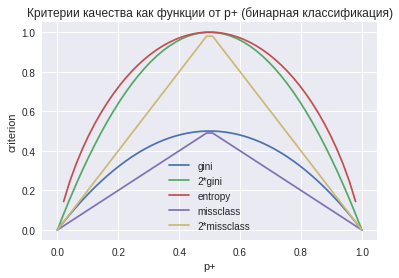

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend()

In [3]:
np.seed = 7
train_data=np.random.normal(size=(100,2))
train_labels=np.zeros(100)

train_data=np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels=np.r_[train_labels, np.ones(100)]

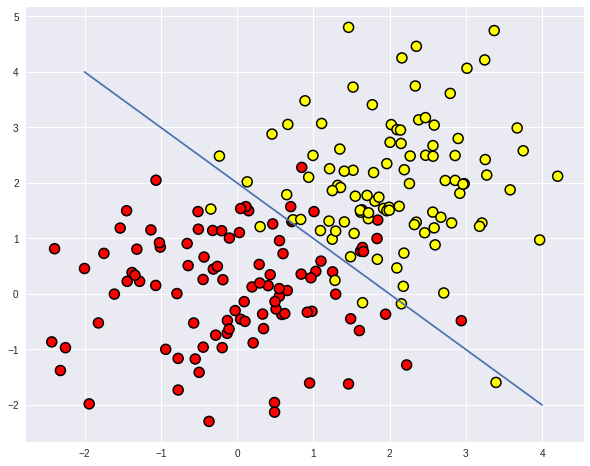

In [4]:
plt.rcParams['figure.figsize']=(10,8)
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100,
           cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

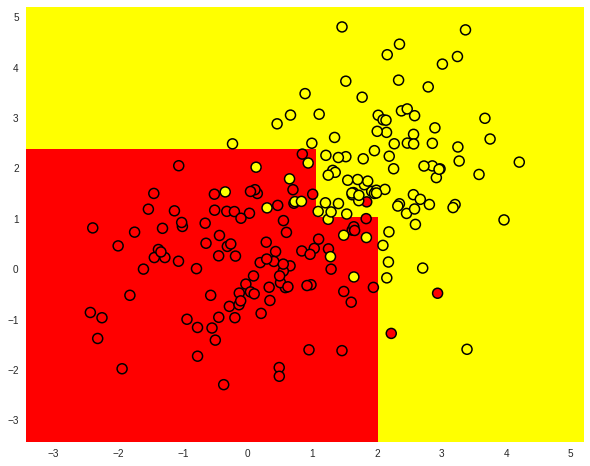

In [5]:
from sklearn.tree import DecisionTreeClassifier
def get_grid(data):
    x_min,x_max=data[:,0].min()-1, data[:,0].max()+1
    y_min,y_max=data[:,0].min()-1, data[:,0].max()+1
    return np.meshgrid(np.arange(x_min,x_max, 0.01), np.arange(y_min, y_max, 0.01))
clf_tree=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data,train_labels)

xx, yy = get_grid(train_data)
predicted=clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted, cmap='autumn')
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels,s=100,
           cmap='autumn', edgecolors='black', linewidth=1.5)

In [6]:
import pydot
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
#(graph,)=pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png')
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'
!rm small_tree.dot

In [7]:
data = pd.DataFrame({'Возраст': [17,64,18,20,38,49,55,25,29,31,33], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

In [8]:
data

,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [9]:
data.sort_values('Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [10]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [11]:
export_graphviz(age_tree, feature_names=['Возраст'], 
                out_file='age_tree.dot', filled=True)
!dot -Tpng 'age_tree.dot' -o'age_tree.png'


In [12]:
data2 = pd.DataFrame({'Возраст':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88], 
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})


In [13]:
data2

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [14]:
data2.sort_values('Возраст')

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [15]:
data2.sort_values('Зарплата')

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [16]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст','Зарплата']].values, 
                 data2['Невозврат кредита'].values);

In [17]:
export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
                out_file='age_sal_tree.dot', filled=True)
!dot -Tpng age_sal_tree.dot -o age_sal_tree.png

In [18]:
n_train = 150        
n_test = 1000       
noise = 0.1


def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


In [19]:
from sklearn.tree import DecisionTreeRegressor
reg_tree=DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred=reg_tree.predict(X_test)

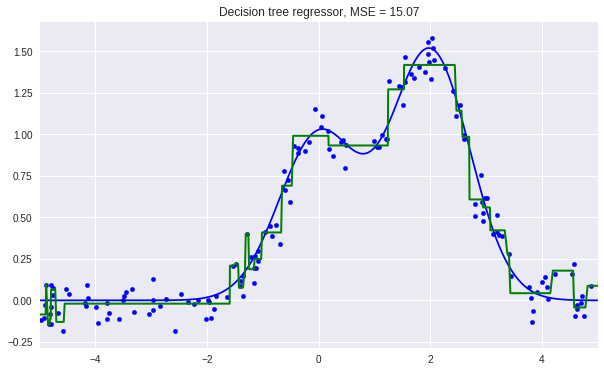

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()
